In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns

# Path to the data
PATH = "data/Cetex_TC1000_0°"

In [42]:
positions = []

# Number of files to read
n_files = len([f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))])

# Iterate over files
for n in range(1, n_files, 500):
    dic_file = f"{PATH}/Flächenkomponente 1_{n:04d}.csv"
    pos = pd.read_csv(dic_file, skiprows=8, delimiter=";")
    pos["step"] = n
    if len(positions) > 0:
        if pos.shape[0] != positions[0].shape[0]:
            print(f"Dropping {dic_file} due to lost facets.")
            continue
    positions.append(pos)


# Stack the dataframes
positions = pd.concat(positions, ignore_index=True)




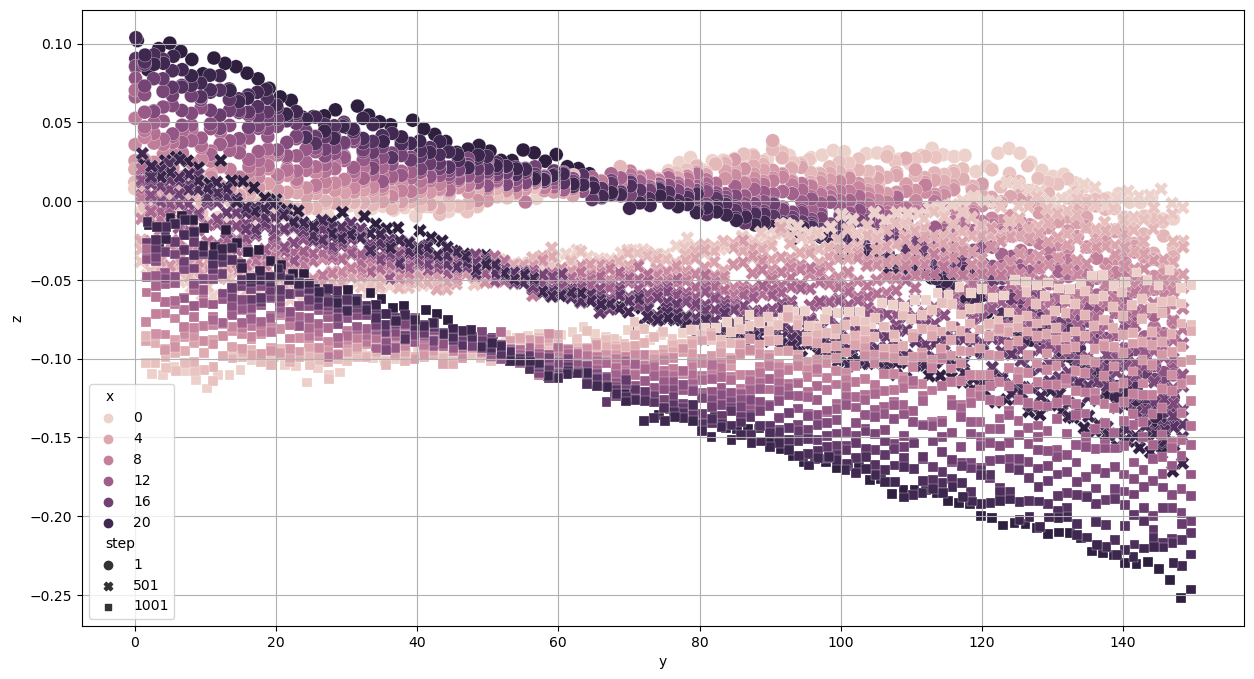

In [60]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=positions, x="y", y="z", hue="x", style="step", s=100, linewidth=0.2)
plt.grid()